# 1& 2. Datasets &DataOperations

In [1]:
#importing libarires
import pandas as pd # for data operations
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plot and visulations

In [2]:
# importing and reading the tags dataset
df=pd.read_csv('book_tags.csv')

In [3]:
# droping the duplicates rows present in data 
df.drop_duplicates(subset=['goodreads_book_id','tag_id'],keep=False,inplace=True)

In [4]:
# selecting only necessary columns from dataset
df=df[['goodreads_book_id','tag_id']]

In [5]:
# renaming columns of dataset
df.rename(columns={'goodreads_book_id':'book_id'},inplace=True)

In [6]:
# importing and reading the books dataset
book=pd.read_csv('books.csv')

In [7]:
# details of book dataset
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [8]:
## droping the duplicates rows present in data 
book.drop_duplicates(subset=['book_id','title'],keep=False,inplace=True)

# 3.Data Visulations

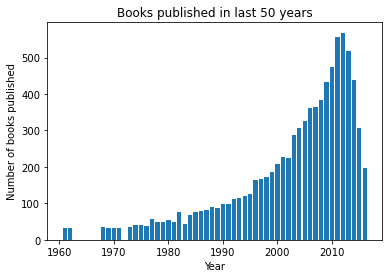

In [9]:
#Numbers of books published in last50 years 
pu=book['original_publication_year'].value_counts().head(50)
x2=pu.index
y2=pu.values
fig,ax=plt.subplots()
ax.bar(x2,y2)
plt.xlabel('Year')
plt.ylabel('Number of books published')
plt.title('Books published in last 50 years');

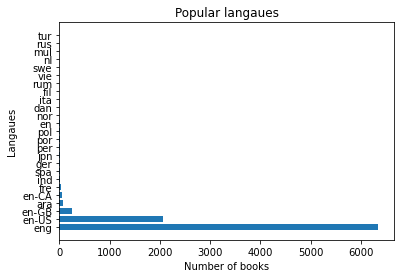

In [10]:
# popular languages present in the dataset
lc=book['language_code'].value_counts()#.plot.bar()
x3=lc.index
y3=lc.values
fig,ax=plt.subplots()
ax.barh(x3,y3)
plt.title('Popular langaues')
plt.xlabel('Number of books')
plt.ylabel('Langaues');

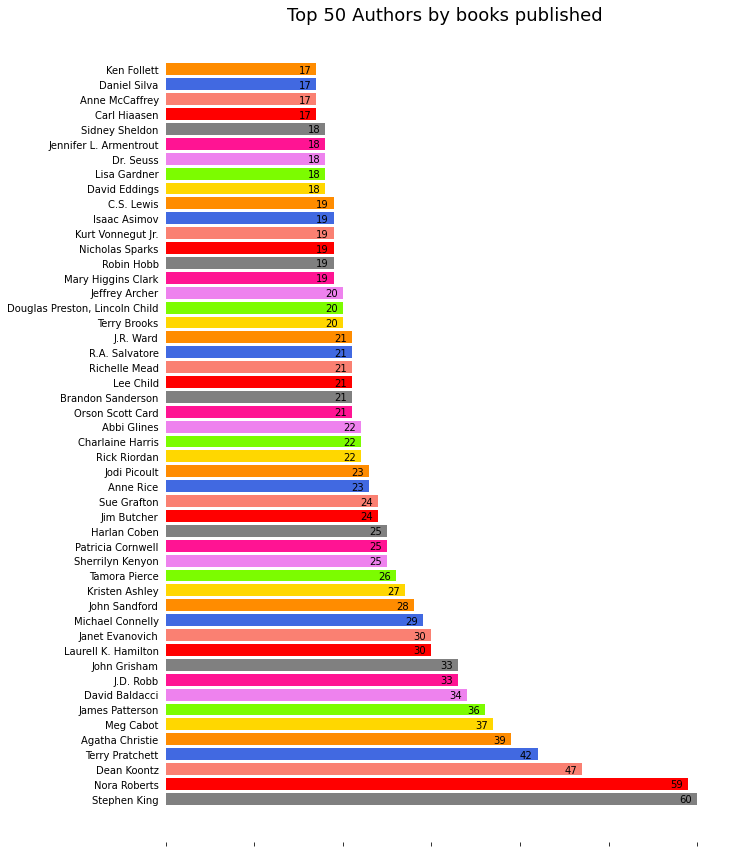

In [11]:
# top authors from the datasets
fig,ax=plt.subplots(figsize=(10,15))
plo=['gray','red','salmon','royalblue','darkorange','gold','lawngreen','violet','deeppink']
counts=book['authors'].value_counts().head(50)
x1=counts.index
y1=counts.values
ax.barh(x1,y1,color=plo)
plt.title('Top 50 Authors by books published',size=18)
for i, v in enumerate(y1):
    ax.text(v-2 , i - .25, str(v), color='black')
plt.tick_params(left=False, labelbottom=False) # for removing ticks and boxes from plot 
plt.box(False)

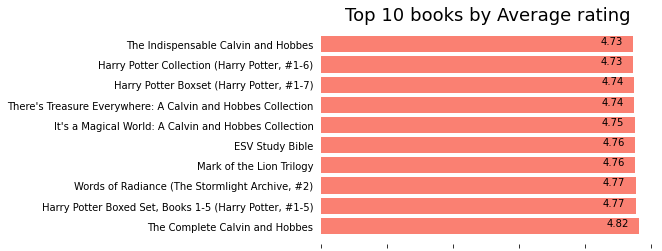

In [12]:
# Top 10 books by rating
top10=book.sort_values(by='average_rating',ascending=False)
fig,ax=plt.subplots()   # creating plot
x11=top10['title'][:10]     # defining x-axis values
y11=top10['average_rating'][:10] # defining y-asis values 
ax.barh(x11,y11,color='salmon') #plotting horizontal plot
plt.title('Top 10 books by Average rating',size=18)
for i, v in enumerate(y11):
    ax.text(v-.5 , i, str(v), color='black')
plt.tick_params(left=False, labelbottom=False) # for removing ticks and boxes in plot
plt.box(False)

In [13]:
# cleanning unnecessary data from the file
book=book[['book_id','title','average_rating']]

In [14]:
# joining the tags and book dataset in one file
final=pd.merge(book,df)

In [15]:
# creating the pivot table using book_id as index and tag_id as columns, and filling nan values with '0'.
books_table=pd.pivot_table(final,index='book_id',columns='tag_id',fill_value=0)
books_table

average_rating                                                        \
tag_id            0     1     2     3     4     5     6     7     8     9       
book_id                                                                         
1                   0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
2                   0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
3                   0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
5                   0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
6                   0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
31538647            0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
31845516            0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
32075671            0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
32848471            0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   
33288638            0.0   0.0     0   0.0     0   0.0   0.0   0.0     0   0.0   

          ...                                                              
tag_id    ... 34242 34243 34244 34245 34246 34247 34248 34249 34250 34251  
book_id   ...                                                              
1         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
6         ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
31538647  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
31845516  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
32075671  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
32848471  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
33288638  ...   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[10000 rows x 34251 columns]

In [16]:
# from stats library importing  sparse matrix
from scipy.sparse import csr_matrix

In [17]:
# converting pivot table into sparse matrix
mat=csr_matrix(books_table.values)

# 4 Methodology.

In [18]:
# from sklearn library importing nearestneighbors algorithm
from sklearn.neighbors import NearestNeighbors
model_knn=NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=-1)
model_knn.fit(mat)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

# 5.Predictions

In [19]:
# book recommendation function"
# always give input in " " form.and input can be exact similar titles of book which is stated in  book dataset.
 

def book_input(enter_book_name):   # always input in " " form.
    a=enter_book_name              #getting users input
    c=final.loc[final['title']==a] # matching with books data
    e=c.iloc[0][0]                 # selecting book_id for data
    d=books_table.loc[books_table.index==e]              # using book_id as query 
    sk=book[['book_id','title']]
    distances,indices= model_knn.kneighbors(d.values.reshape(1,-1),n_neighbors=6) # input for the knn
    print('recommended books for title  '+ str(enter_book_name))
    z={}
    i=-1
    for i in range(0,len(distances.flatten())):
        z[i]=books_table.index[indices.flatten()[i]]
    yhh=[]
    i=-1
    for i in range(0,len(z)):
        new=sk.loc[sk['book_id']==z[i]]
        ghi=new.values
        print(ghi)

# Enter your querey here

In [20]:
book_input('The Silmarillion (Middle-Earth Universe)')

recommended books for title  The Silmarillion (Middle-Earth Universe)
[[7332 'The Silmarillion (Middle-Earth Universe)']]
[[7329 'Unfinished Tales of Númenor and Middle-Earth']]
[[15241 'The Two Towers (The Lord of the Rings, #2)']]
[[33 'The Lord of the Rings (The Lord of the Rings, #1-3)']]
[[597790 'The Children of Húrin']]


In [ ]:
book_input